import packages

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as mtpl
import seaborn as sns

read data

In [10]:
data = pd.read_csv("/content/StudentsPerformance.csv")

In [11]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

## Checking the null values

In [13]:
null_values = data.isnull().sum()
print(null_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Checking all the columns present in the given data

In [14]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Finding average score

In [18]:
data['average score'] = (data['math score'] + data['writing score'] + data['reading score'])/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Average score is decimal data so rounding it with 2

---



In [19]:
data['average score'] = np.round(data['average score'], 2)

In [20]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


1.

In [30]:
#Save the data into Clean data folder
data.to_csv("/content/CleanData_Student_Performance.csv")

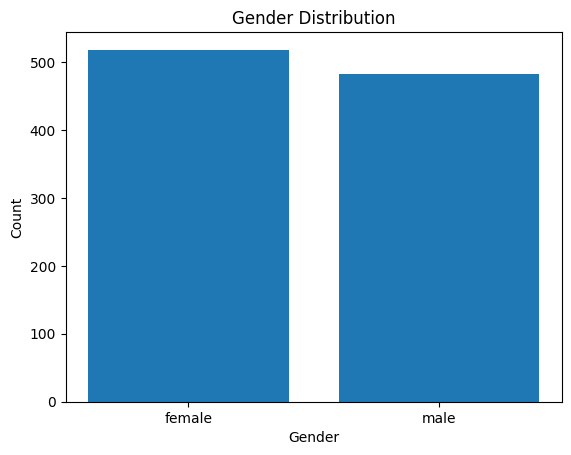

In [21]:
import matplotlib.pyplot as mtpl

gender_count = data['gender'].value_counts()
mtpl.bar(gender_count.index, gender_count.values)
mtpl.title('Gender Distribution')
mtpl.xlabel('Gender')
mtpl.ylabel('Count')
mtpl.savefig ("/content/results/gender_distribution")
mtpl.show()

<ipython-input-22-c2b022d5795f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sebn.boxplot(x='gender', y='reading score', data=data,


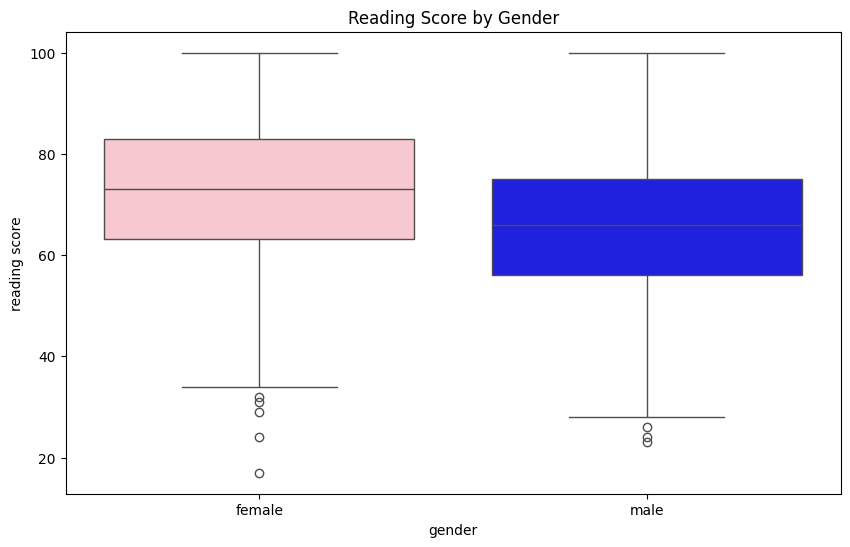

In [22]:
plt.figure(figsize=(10, 6))

# Create the box plot with specific colors for male and female
boxplot = sebn.boxplot(x='gender', y='reading score', data=data,
                      palette={"male": "blue", "female": "pink"}) # Customize colors here

plt.title('Reading Score by Gender')
plt.show()

# To save the figure
fig = boxplot.get_figure()
fig.savefig('/content/results/Reading_score_by_gender')

**Race Plot**

In [23]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [24]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

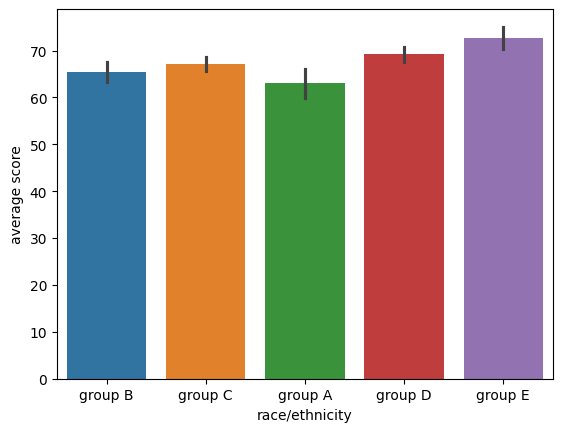

In [25]:
raceplot= sebn.barplot(data = data, x = 'race/ethnicity', y= 'average score', hue = 'race/ethnicity')
figure= raceplot.get_figure()
figure.savefig("/content/results/race_ave_score")

**Create a scatter plot comparing Average Score with Math, Writing, and Reading Scores**

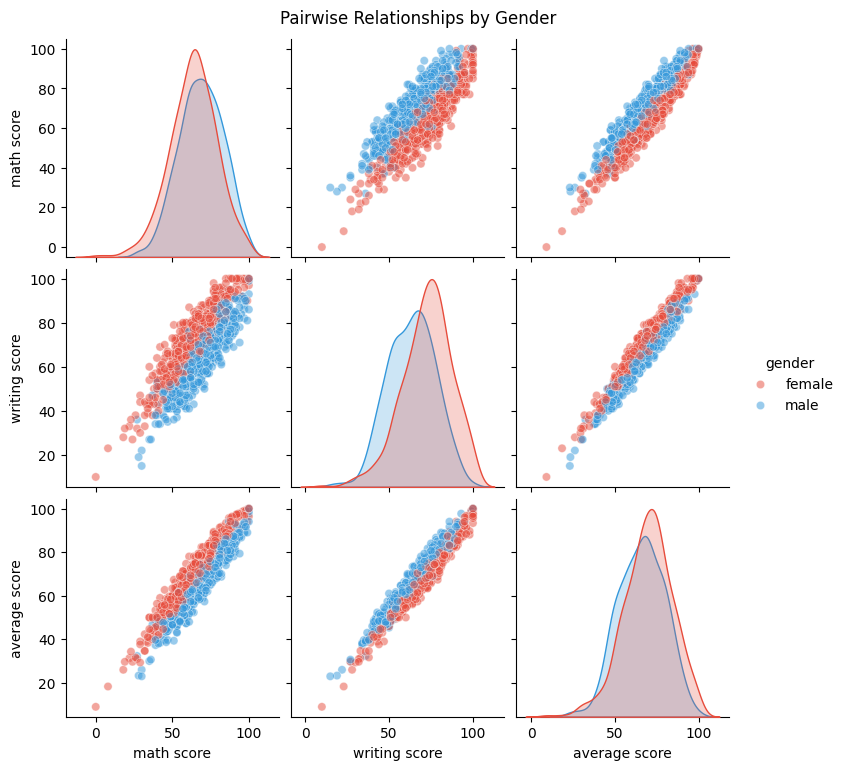

In [26]:
import seaborn as sebn
import matplotlib.pyplot as mtpl

# Subset the data to include only the relevant columns for clarity in the pair plot
subset_data = data[['math score', 'writing score', 'average score', 'gender']]

# Create a pair plot
sebn.pairplot(subset_data, hue='gender', palette={'male': '#3498db', 'female': '#e74c3c'},
             plot_kws={'alpha': 0.5})  # Adjust alpha to make points semi-transparent

plt.suptitle('Pairwise Relationships by Gender', y=1.02)  # Title for the whole figure, adjust y for spacing
plt.savefig('/content/results/PairPlot_Scores_by_Gender.jpg')
plt.show()

<ipython-input-27-7b5a7ea02499>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='gender', y='average score', data=data, palette=['#e74c3c', '#2ecc71'])  # Red and green colors


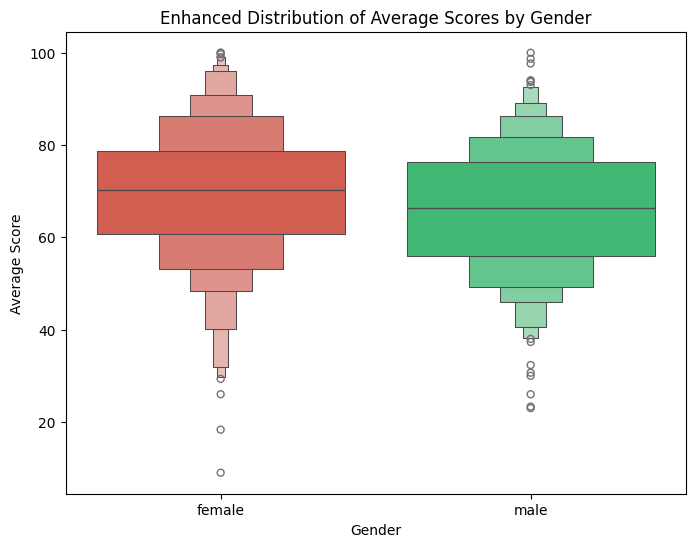

In [27]:
import seaborn as sebn
import matplotlib.pyplot as mtpl

# Ensure the correct import for matplotlib.pyplot
import matplotlib.pyplot as mtpl

plt.figure(figsize=(8, 6))
# Using a boxen plot to display the distribution of average scores by gender
sns.boxenplot(x='gender', y='average score', data=data, palette=['#e74c3c', '#2ecc71'])  # Red and green colors
plt.title('Enhanced Distribution of Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')

# Save the figure
plt.savefig('/content/results/ave_score_by_gender_boxenplot.jpg')
plt.show()

In [29]:
data['average score'] = np.round(data['average score'], 2)

<ipython-input-28-95372da82c7a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sebn.boxplot(data=data, x='parental level of education', y='average score', palette="Dark2")


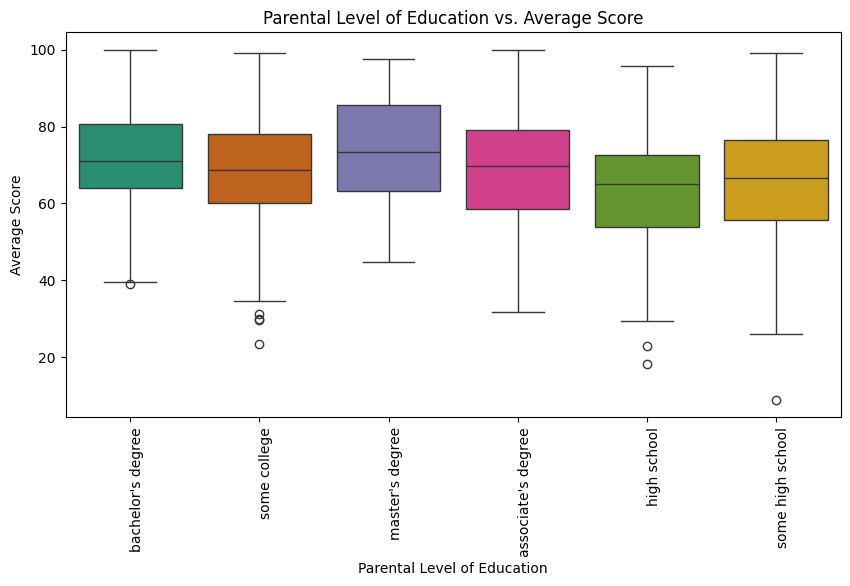

In [28]:
import seaborn as sebn
import matplotlib.pyplot as mtpl

plt.figure(figsize=(10, 5))
# Using 'Dark2' palette for better color distinction in a box plot
sebn.boxplot(data=data, x='parental level of education', y='average score', palette="Dark2")
plt.title('Parental Level of Education vs. Average Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=90, ha='left')  # Adjusting the x-axis labels for better readability

# Adjust the file save path to work in this environment
plt.savefig('/content/results/BoxPlot_PLE_VS_Avg_Score_BoxPlot')
plt.show()